# In Class Notebook, Week 08

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week08/inClass_week08.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import numpy as np
import bqplot

In [2]:
# 1. data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

In [3]:
# 2. scales
sc_geo = bqplot.Mercator()

In [4]:
# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

In [6]:
# put it all together as a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0,'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [7]:
# 1. axis/data
shape_data = bqplot.topo_load('map_data/WorldMap.json') # shapes we want to draw

# 2. scales
sc_geo = bqplot.Gnomonic() # a nightmare!

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# 4. figur
fig = bqplot.Figure(marks=[shape_map], 
                    fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [9]:
# axis/data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo})

# in figure
fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [11]:
!ls /Users/jillnaiman/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


In [10]:
# axis/data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# tool tip!
tt = bqplot.Tooltip(fields=['id','name'])
states_map.interactions = {'click':'select', 'hover':'tooltip'}

# marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo},
                       tooltip=tt)

# in figure
fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

## Geopandas

In [12]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [13]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

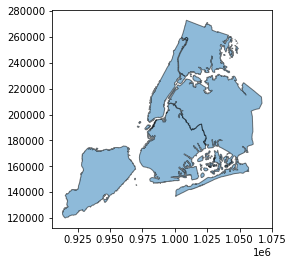

In [15]:
gdf.plot(alpha=0.5, edgecolor='k')

In [16]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [17]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [18]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.298582e+08,115689.972103
std,1.581139,6.161040e+07,61814.979912
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.838498e+08,144362.359386
max,815.000000,2.009197e+08,211060.175261


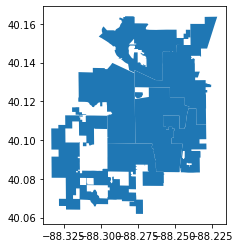

In [19]:
gdf_councils.plot()